In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter

from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import (GridSearchCV, cross_val_score, 
StratifiedKFold, learning_curve)

In [2]:
data_train = pd.read_csv('data/train.csv')
data_train.shape

(8395, 44)

In [3]:
data_val = pd.read_csv('data/val.csv')
data_val.shape

(3598, 44)

In [4]:
data_test = pd.read_csv('data/test.csv')
data_test.shape

(1333, 44)

In [5]:
data_test.columns.tolist()

['age',
 'job_ok',
 'nbre_enf',
 'ann_dipl',
 'ordre',
 'annee_ent',
 'date_ps',
 'dat_retraite',
 'dt_echeance',
 'tot_afct',
 'sexe_FEMININ',
 'sexe_MASCULIN',
 'sit_fam_CELIBATAIRE',
 'sit_fam_DIVORCE(E)',
 'sit_fam_MARIE(E)',
 'sit_fam_VEUF(VE)',
 'nature_APTITUDE PROFESSIONNEL',
 'nature_APTITUDE PROFESSIONNELLE',
 'nature_ATTESTATION',
 'nature_CERTIFICAT',
 'nature_DIPLOME',
 'nature_FORMATION',
 'statut_act_DECEDE(E)',
 'statut_act_EN FONCTION',
 'statut_act_FIN DE CONTRAT',
 'statut_act_RETRAITE(E)',
 'log_age',
 'log_job_ok',
 'log_nbre_enf',
 'log_ordre',
 'log_annee_ent',
 'log_date_ps',
 'log_dat_retraite',
 'log_dt_echeance',
 'log_tot_afct',
 'std_age',
 'std_job_ok',
 'std_nbre_enf',
 'std_ordre',
 'std_annee_ent',
 'std_date_ps',
 'std_dat_retraite',
 'std_dt_echeance',
 'std_tot_afct']

In [6]:
done=[
 'sexe_FEMININ',
 'sexe_MASCULIN',
 'sit_fam_CELIBATAIRE',
 'sit_fam_DIVORCE(E)',
 'sit_fam_MARIE(E)',
 'sit_fam_VEUF(VE)',
 'nature_APTITUDE PROFESSIONNEL',
 'nature_APTITUDE PROFESSIONNELLE',
 'nature_ATTESTATION',
 'nature_CERTIFICAT',
 'nature_DIPLOME',
 'nature_FORMATION',
 'statut_act_DECEDE(E)',
 'statut_act_EN FONCTION',
 'statut_act_FIN DE CONTRAT',
 'statut_act_RETRAITE(E)',
 'age',
 'job_ok',
 'nbre_enf',
 'ann_dipl',
 'ordre',
 'annee_ent',
 'date_ps',
 'dat_retraite',
 'dt_echeance',
]

In [7]:
X=done
X_train = data_train[X]
X_test = data_test[X]
X_val = data_val[X]
y_train = data_train['tot_afct']
y_test = data_test['tot_afct']
y_val = data_val['tot_afct']


In [8]:
kfold = StratifiedKFold(n_splits=10)

c:\users\kitty\pycharmprojects\testaffichage\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


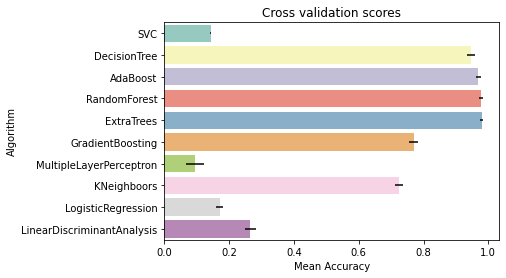

In [9]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

I decided to choose the AdaBoost,RandomForest,ExtraTrees, and the GradientBoosting classifiers for the ensemble modeling. 

#### Hyperparameter Tuning for best models

In [10]:
# AdaBoost

DTC = DecisionTreeClassifier()
adaDTC = AdaBoostClassifier(DTC, random_state=7)
ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


In [11]:
gsadaDTC.best_score_

0.9699818377887507

In [12]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.9845137351722573

In [13]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.9799863783415631

In [14]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.9734337930643056

####  Plot Learning Curves

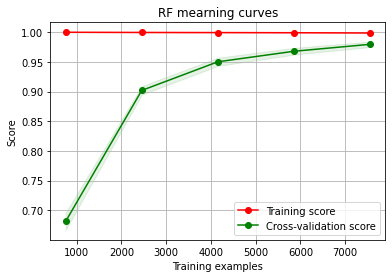

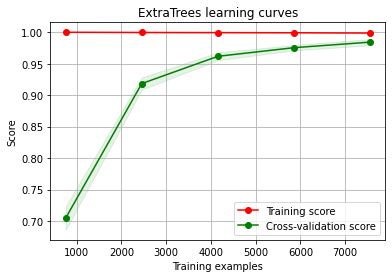

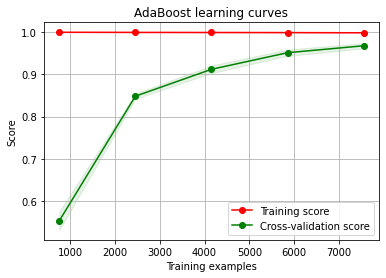

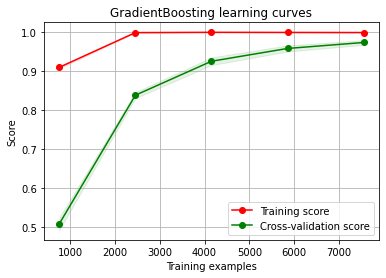

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=kfold)

#### Feature imporance of tree-based classifiers

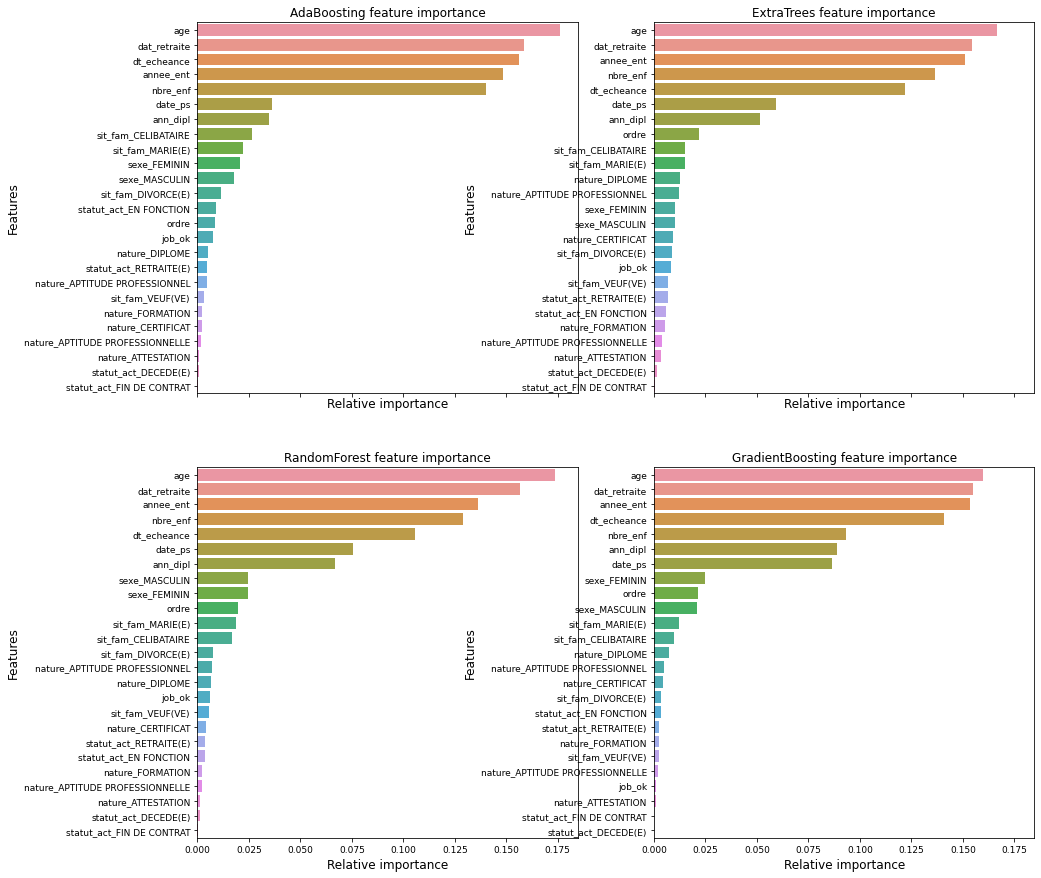

In [17]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

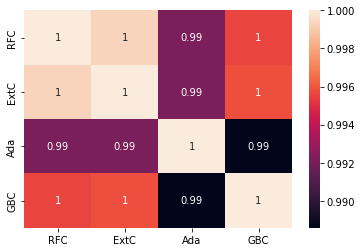

In [21]:
test_RFC = pd.Series(RFC_best.predict(X_test), name="RFC")
test_ExtC = pd.Series(ExtC_best.predict(X_test), name="ExtC")
test_AdaC = pd.Series(ada_best.predict(X_test), name="Ada")
test_GBC = pd.Series(GBC_best.predict(X_test), name="GBC")


# Concatenate all classifier results
# ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC],axis=1)
ensemble_results = pd.concat([test_RFC,test_ExtC,test_AdaC,test_GBC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

###  Ensemble Modelling

#### Combining Models

In [23]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best)
                                       , ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, y_train)

###  Prediction

In [24]:
votingC.predict(X_test)

array([3., 4., 1., ..., 2., 5., 3.])